<a href="https://colab.research.google.com/github/dewi31/classification_of_clickbait_news/blob/main/classification_of_news_headlines_using_NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
news = pd.read_csv('/content/clickbait_data.csv')
# Parameter
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = .8

In [3]:
# Membagi data
sentences = news.headline
labels = news.clickbait
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(sentences,
                                                                                labels,
                                                                                train_size=training_portion,
                                                                                shuffle=False
                                                                                )

In [4]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(training_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length,truncating=trunc_type)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length,truncating=trunc_type)

In [23]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(18, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])
model.fit(train_padded, training_labels, epochs=50, validation_data=(validation_padded, validation_labels))

Epoch 1/50
800/800 [==============================] - 3s 3ms/step - loss: 0.5248 - accuracy: 0.7321 - val_loss: 0.3648 - val_accuracy: 0.8863
Epoch 2/50
800/800 [==============================] - 3s 4ms/step - loss: 0.1725 - accuracy: 0.9403 - val_loss: 0.2302 - val_accuracy: 0.9202
Epoch 3/50
800/800 [==============================] - 2s 3ms/step - loss: 0.1214 - accuracy: 0.9550 - val_loss: 0.1708 - val_accuracy: 0.9423
Epoch 4/50
800/800 [==============================] - 2s 3ms/step - loss: 0.1042 - accuracy: 0.9614 - val_loss: 0.1319 - val_accuracy: 0.9570
Epoch 5/50
800/800 [==============================] - 2s 3ms/step - loss: 0.0955 - accuracy: 0.9639 - val_loss: 0.1493 - val_accuracy: 0.9514
Epoch 6/50
800/800 [==============================] - 2s 3ms/step - loss: 0.0898 - accuracy: 0.9661 - val_loss: 0.1527 - val_accuracy: 0.9502
Epoch 7/50
800/800 [==============================] - 3s 3ms/step - loss: 0.0854 - accuracy: 0.9679 - val_loss: 0.1391 - val_accuracy: 0.9555
Epoch 

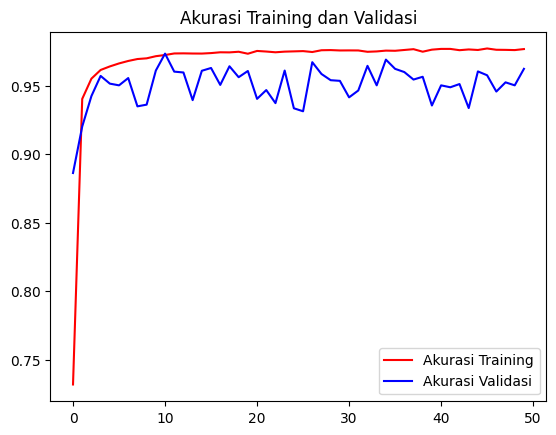

<Figure size 640x480 with 0 Axes>

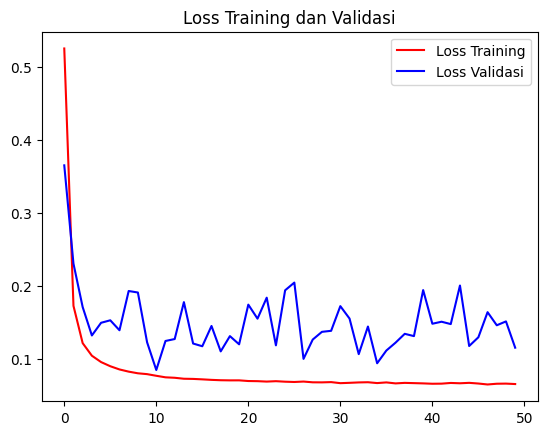

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Loss Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()